# Week 2

## Overview

Ok, so we've made it to week 2. Today's lecture has 4 parts. 
* First, we'll go over some practical information. 
* Then we'll do a little data visualization exercise (which we'll come back to later in the semester). 
* As the main event, we will work with crime-data and generate a large number of interesting and informative plots. 
* Finally - in the last part - we'll play around with visualizing the geo-data contained in the CSV file.

## Part 1: Some practical things

The videos below contain important practical information, so - although I covered most of this in class last week - I recommend you watch them (it's sometimes good to hear things a second time). You don't necessarily have to start by watching these - it's something you can do if you need a break from coding

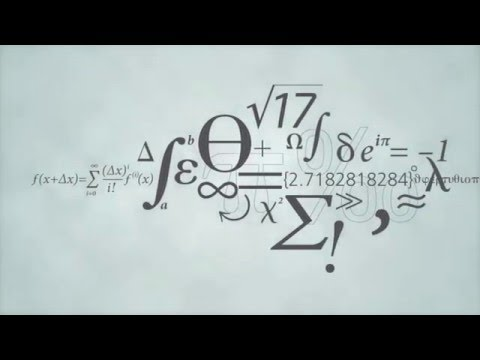

In [1]:
# Video 1. The structure of the course
from IPython.display import YouTubeVideo
YouTubeVideo("42KjmxgYYNI",width=800, height=450)

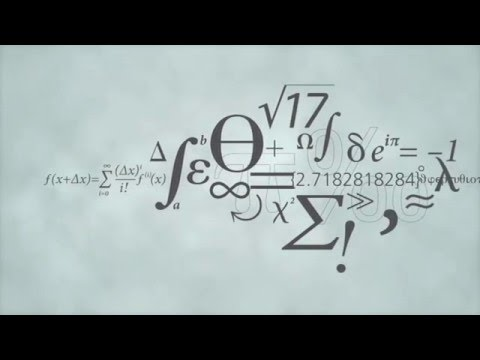

In [2]:
# Video 2: The assignments
YouTubeVideo("sSQBcbQ3FL0",width=800, height=450)

## Part 2: A little visualization exercise


> *Exercise*: 
> 
> Start by downloading these four datasets: [Data 1](https://raw.githubusercontent.com/suneman/socialdataanalysis2020/master/files/data1.tsv), [Data 2](https://raw.githubusercontent.com/suneman/socialdataanalysis2020/master/files/data2.tsv), [Data 3](https://raw.githubusercontent.com/suneman/socialdataanalysis2020/master/files/data3.tsv), and [Data 4](https://raw.githubusercontent.com/suneman/socialdataanalysis2020/master/files/data4.tsv). The format is `.tsv`, which stands for _tab separated values_. 
> Each file has two columns (separated using the tab character). The first column is $x$-values, and the second column is $y$-values.  
>
> It's ok to just download these files to disk by right-clicking on each one, but if you use Python and _urllib_ or _urllib2_ to get them, I'll really be impressed. If you don't know how to do that, I recommend opening up Google and typing "download file using Python" or something like that. When interpreting the search results remember that _stackoverflow_ is your friend.
> 
> * Using the `numpy` function `mean`, calculate the mean of both $x$-values and $y$-values for each dataset. 
> * Use python string formatting to print precisely two decimal places of these results to the output cell. Check out [this _stackoverflow_ page](http://stackoverflow.com/questions/8885663/how-to-format-a-floating-number-to-fixed-width-in-python) for help with the string formatting. 
> * Now calculate the variance for all of the various sets of $x$- and $y$-values (to three decimal places).
> * Use `numpy` to calculate the [Pearson correlation](https://en.wikipedia.org/wiki/Pearson_product-moment_correlation_coefficient) between $x$- and $y$-values for all four data sets (also to three decimal places).
> * The next step is use _linear regression_ to fit a straight line $f(x) = a x + b$ through each dataset and report $a$ and $b$ (to two decimal places). An easy way to fit a straight line in Python is using `scipy`'s `linregress`. It works like this
> ```
> from scipy import stats
> slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
>```
> * Finally, it's time to plot the four datasets using `matplotlib.pyplot`. Use a two-by-two [`subplot`](http://matplotlib.org/examples/pylab_examples/subplot_demo.html) to put all of the plots nicely in a grid and use the same $x$ and $y$ range for all four plots. And include the linear fit in all four plots. (To get a sense of what I think the plot should look like, you can take a look at my version [here](https://raw.githubusercontent.com/suneman/socialdataanalysis2017/master/files/anscombe.png).)
> * Explain - in your own words - what you think my point with this exercise is.


Get more insight in the ideas behind this exercise by reading [here](https://en.wikipedia.org/wiki/Anscombe%27s_quartet).

And the video below generalizes in the coolest way imaginable. It's a treat, but don't watch it until **after** you've done the exercises.

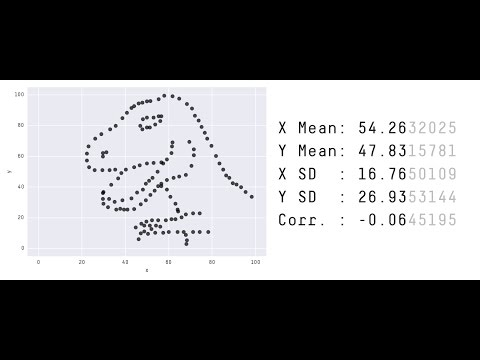

In [3]:
YouTubeVideo("DbJyPELmhJc",width=800, height=450)

## Part 3: Working with the dataset 

The exercises today will continue to focus on the data in the big CSV file. 

Let's start by think a bit more about the crime-data file from San Francisco that you downloaded last week. We'll again only look at the focus-crimes.

In [4]:
focuscrimes = set(['WEAPON LAWS', 'PROSTITUTION', 'DRIVING UNDER THE INFLUENCE', 'ROBBERY', 'BURGLARY', 'ASSAULT', 'DRUNKENNESS', 'DRUG/NARCOTIC', 'TRESPASS', 'LARCENY/THEFT', 'VANDALISM', 'VEHICLE THEFT', 'STOLEN PROPERTY', 'DISORDERLY CONDUCT'])

> *Exercise*: More temporal patterns. Last time we plotted the development over time (how each of the focus crimes changed over time, year-by-year). Today we'll start by looking at the developments across the months, week and across the 24 hours of the day. 
> Again, restrict yourself to the dataset of entire years 2013-2018.
>
> * *Weekly patterns*. Basically, we'll forget about the yearly variation and just count up what happens during each weekday. [Here's what my version looks like](https://raw.githubusercontent.com/suneman/socialdataanalysis2020/master/files/weekdays.png). Some things make sense - for example `drunkenness` and the weekend. But there are some aspects that were surprising to me. Check out `prostitution` and mid-week behavior, for example!?
> * *The months*. We can also check if some months are worse by counting up number of crimes in Jan, Feb, ..., Dec. Did you see any surprises there?
> * *The 24 hour cycle*. We'll can also forget about weekday and simply count up the number of each crime-type that occurs in the entire dataset from midnight to 1am, 1am - 2am ... and so on. Again: Give me a couple of comments on what you see. 
> * *Hours of the week*. But by looking at just 24 hours, we may be missing some important trends that can be modulated by week-day, so let's also check out the 168 hours of the week. So let's see the number of each crime-type Monday night from midninght to 1am, Monday night from 1am-2am - all the way to Sunday night from 11pm to midnight.


The next thing we'll be looking into is how crimes break down across the 10 districts in San Francisco.

> *Exercises*: The types of crime and how they take place across San Francisco's police districts.
>  
>  * So now we'll be combining information about `PdDistrict` and `Category` to explore differences between SF's >neighborhoods. First, simply list the names of SF's 10 police districts.
>  * Which has the most crimes? Which has the most focus crimes?
>  * Next, we want to generate a slightly more complicated graphic. I'm interested to know if there are certain crimes >that happen much more in certain neighborhoods than what's typical. Below I describe how to get that plot going
>    - First, we need to calculate the relative probabilities of seeing each type of crime in the dataset as a whole. > That's simply a normalized version of [this plot](https://raw.githubusercontent.com/suneman/socialdataanalysis2020/master/files/categoryhist.png). Let's call it `P(crime)`.
>    - Next, we calculate that same probability distribution _but for each PD district_, let's call that `P(crime|district)`.
>    - Now we look at the ratio `P(crime|district)/P(crime)`. That ratio is equal to 1 if the crime occurs at the same level within a district as in the city as a whole. If it's greater than one, it means that the crime occurs _more frequently_ within that district. If it's smaller than one, it means that the crime is _rarer within the district in question_ than in the city as a whole.
>    - For each district plot these ratios for the 14 focus crimes. My plot looks like this
>      ![Histograms](https://raw.githubusercontent.com/suneman/socialdataanalysis2019/master/files/conditional.png)
>    - Comment on the top crimes in _Tenderloin_, _Mission_, and _Richmond_. Does this fit with the impression you get of these neighborhoods on Wikipedia?

**Comment**. Notice how much awesome datascience (i.e. learning about interesting real-world crime patterns) we can get out by simply counting and plotting (and looking at ratios). Pretty great, right?

## Part 4: Visualizing Geo-data
Finally, we will draw on the fact that the crime data has lots of exciting geo-data attached. We'll take our inspiration from the implementation shown in the [following article](https://towardsdatascience.com/mapping-geograph-data-in-python-610a963d2d7f) for plotting the GPS data. The article describes how you can visualize geo-data using the `Pandas` and `Matplotlib` packages.

> *Exercise:* We will try to find out where it is safest to leave your car on a Sunday.
> * Step 0: Read the [tutorial](https://towardsdatascience.com/mapping-geograph-data-in-python-610a963d2d7f) to get a sense of the flow of things.
> * Start your own work by downloading the [GeoJSON](https://wiki.fileformat.com/gis/geojson/) file [**here**](https://raw.githubusercontent.com/suneman/socialdataanalysis2020/master/files/sfpddistricts.geojson).
> * There are a number of formats for geographical areas, and the article uses *ShapeFiles*, so you will have to convert GeoJSON (one geo-spatial file formate) to ShapeFiles (another geo-spatial file formate), [see the stackoverflow topic](https://stackoverflow.com/a/44050383). Hint: The idea is to is to import the `subprocess` package and copy the last two lines of the solution. 
> * *Hint: it may require that you install the python package gdal with* `conda install gdal`. *More details on slack* 

> * Now, play around with the functions in the 6-9 parts of the article. See if you can generate something like the plot below
![heat map](https://raw.githubusercontent.com/suneman/socialdataanalysis2020/master/files/heat_maps_simple.png)
> Take a moment to congratulate yourself. You now know how to select and format shapefiles!
> * Now, we can focus on our main goal: *determine the districts where you should (and should not) leave your car on Sundays*. (Or stated differently, count up the number of thefts.)
> * To do so, first:
>  * Filter the crime dataset by the `DayOfWeek` category and also choose the appropriate crime category.
>  * Aggregate data by police district.
> * The result should look more or less like the plot below. 
>   - You do not have to change the color pallete ... or put the names of the districts above the map (as it requires that you change some parts of the functions: `plot_districts_data`, `plot_map_fill_multiples_ids_tone` and `calc_color`) ... but if you feel confident with Python - go for it! 
![heat map](https://raw.githubusercontent.com/suneman/socialdataanalysis2020/master/files/sf_heatmap.png)
> * Based on your map, where should you park the car for it to be safest? And where's the worst place?
> *Try this for Extra credit:*
> * Create plots for the same crime type, but different days -> comment on the results

(Credit: Thank you to TA Germans Savcisens for helping put this exercise together)